<a href="https://colab.research.google.com/github/siska-23/computer_vision/blob/main/Projek_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
print("GPU available?", torch.cuda.is_available())
print("Device:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU only")

GPU available? True
Device: Tesla T4


In [2]:
!nvidia-smi

Mon Jun 23 05:12:49 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   52C    P8             11W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
%cd /content
!rm -rf yolov5

/content


In [4]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17496, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 17496 (delta 2), reused 0 (delta 0), pack-reused 17490 (from 3)
Receiving objects: 100% (17496/17496), 16.59 MiB | 18.51 MiB/s, done.
Resolving deltas: 100% (11993/11993), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 989.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.7 MB/s eta 0:

In [5]:
!pip install torch torchvision torchaudio
!pip install matplotlib opencv-python

In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ixbpJ0ILQZhHmHZczn76")
project = rf.workspace("maria-ulfa-huzlo").project("ripening-avocado-model")
version = project.version(2)
dataset = version.download("yolov5")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 97.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Ripening-Avocado-Model-2 in yolov5pytorch:: 100%|██████████| 10012/10012 [00:01<00:00, 6467.68it/s]


In [7]:
import os
from collections import Counter

# Ganti dengan path ke label dataset kamu
labels_dir = "/content/yolov5/Ripening-Avocado-Model-2/train/labels"  # atau 'valid/labels', 'test/labels' untuk subset lain

label_counts = Counter()

# Baca semua file label
for label_file in os.listdir(labels_dir):
    with open(os.path.join(labels_dir, label_file), 'r') as f:
        lines = f.readlines()
        for line in lines:
            class_id = int(line.strip().split()[0])
            label_counts[class_id] += 1

# Mapping ID ke nama kelas (bisa dilihat dari dataset.yaml)
class_names = ['Mentah', 'Setengah Matang', 'Matang', 'Terlalu Matang', 'Busuk']

# Tampilkan hasil
print("📊 Jumlah data per label:")
for class_id, count in label_counts.items():
    print(f"{class_names[class_id]} ({class_id}): {count} instances")

📊 Jumlah data per label:
Matang (2): 663 instances
Mentah (0): 823 instances
Setengah Matang (1): 560 instances
Terlalu Matang (3): 790 instances
Busuk (4): 666 instances


In [8]:
!python train.py --img 640 --batch 16 --epochs 100 --data /content/yolov5/Ripening-Avocado-Model-2/data.yaml --weights yolov5s.pt --cache

Streaming output truncated to the last 5000 lines.
      88/99      4.48G   0.005651   0.003127    0.02012         32        640:  75% 165/219 [00:47<00:16,  3.26it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      88/99      4.48G    0.00566    0.00313    0.02019         37        640:  76% 166/219 [00:48<00:16,  3.19it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      88/99      4.48G   0.005644   0.003126    0.02019         28        640:  76% 167/219 [00:48<00:17,  2.98it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      88/99      4.48G    0.005

In [ ]:
#!python train.py --resume

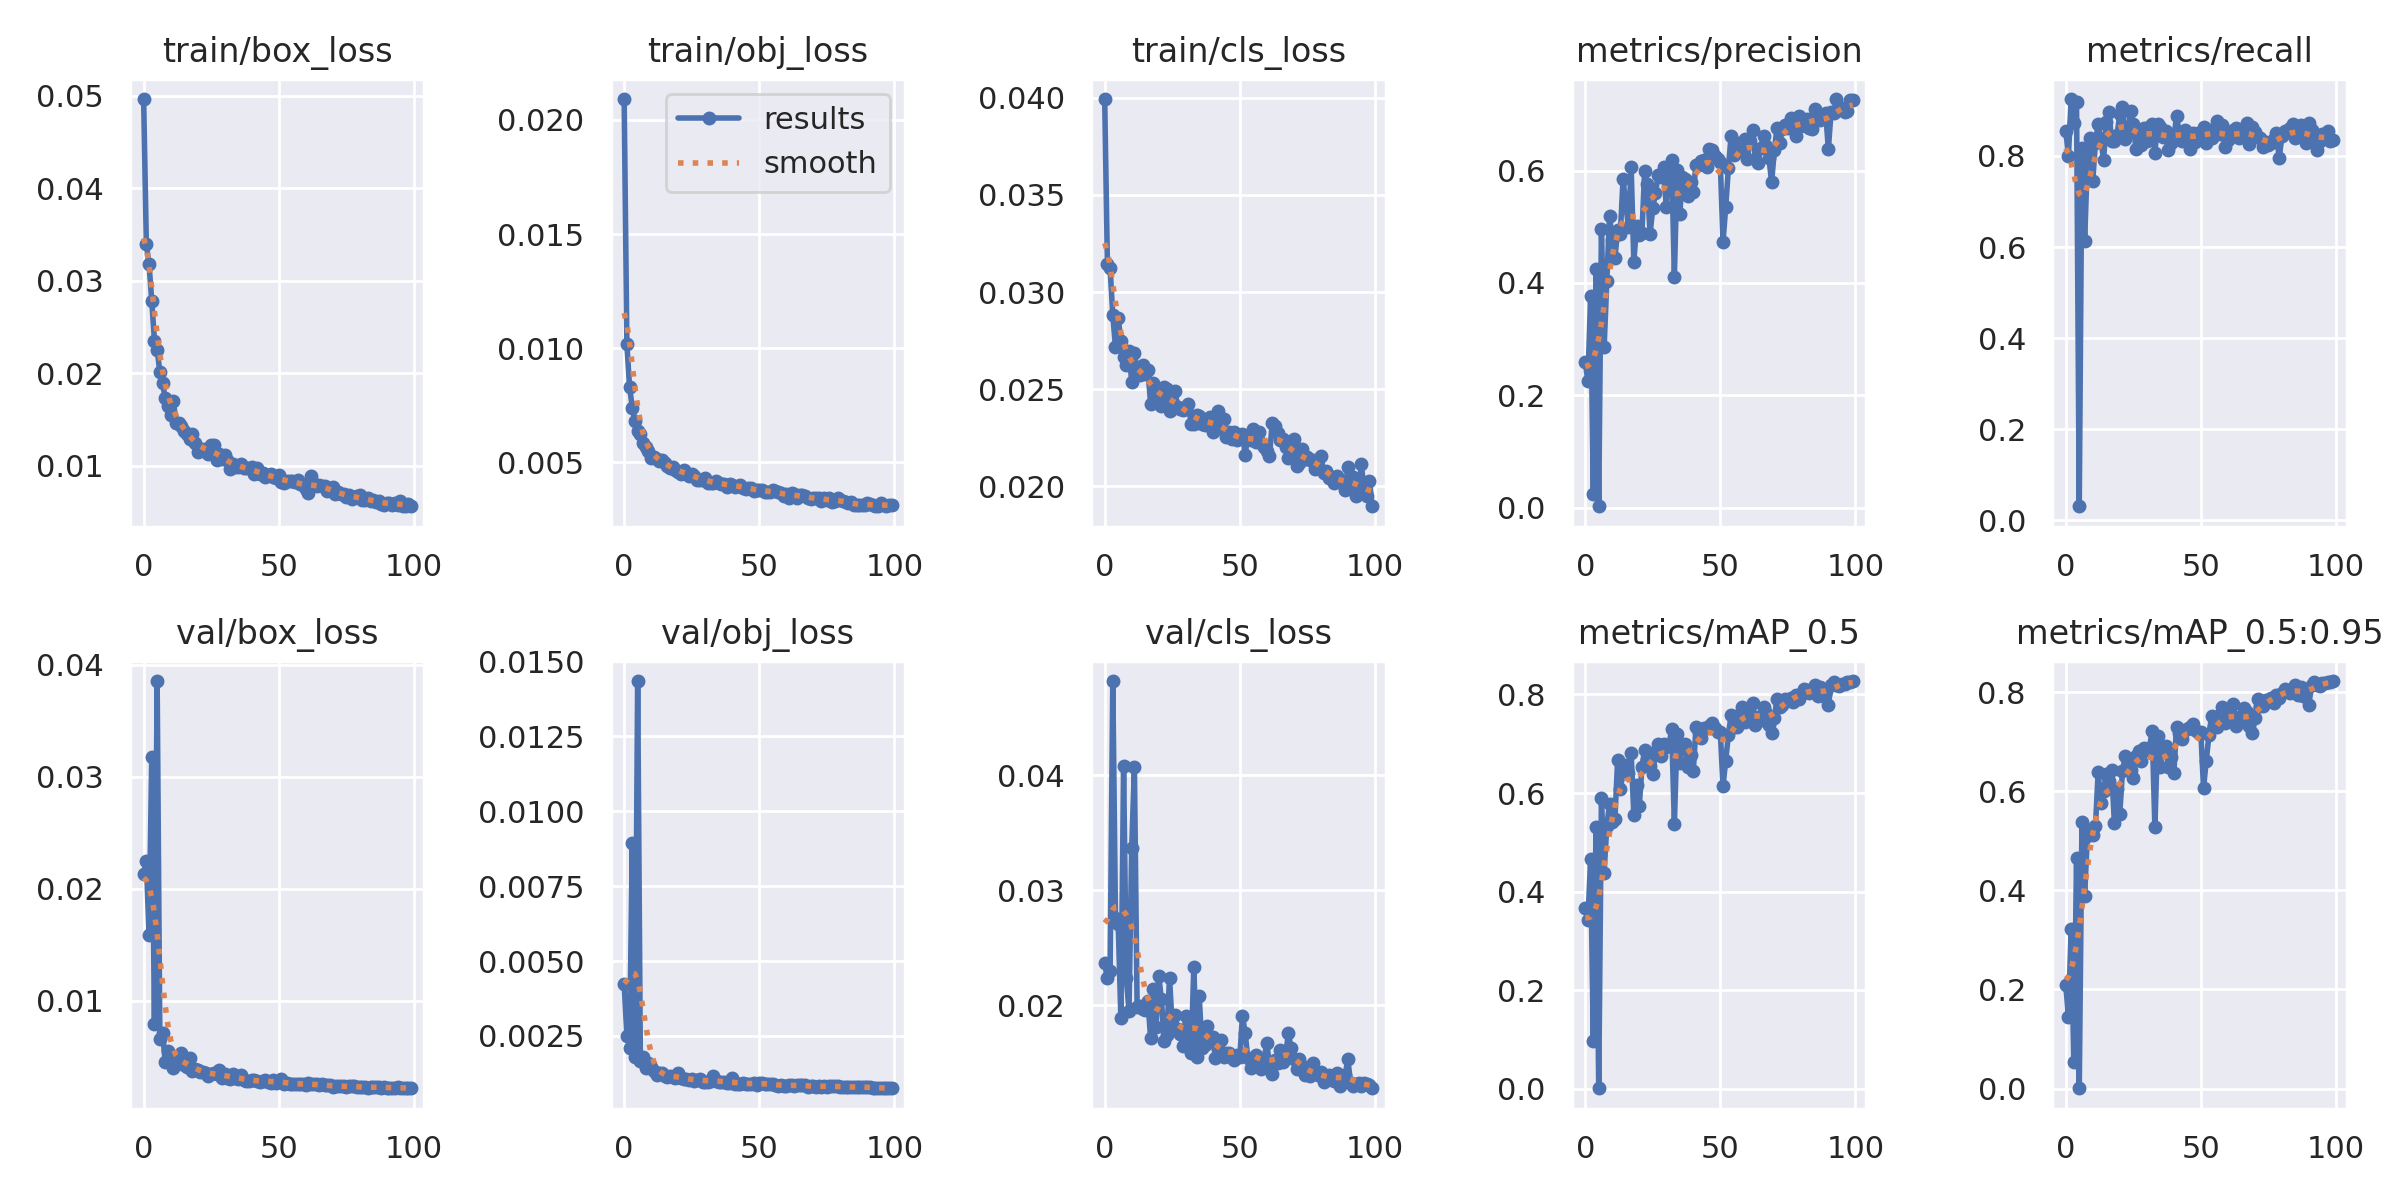

In [11]:
from IPython.display import Image, display

# Tampilkan semua grafik hasil training
display(Image(filename='/content/yolov5/runs/train/exp/results.png'))

In [12]:
import pandas as pd
df = pd.read_csv('/content/yolov5/runs/train/exp/results.csv')

df.columns = df.columns.str.strip()  # Menghapus spasi di awal/akhir nama kolom

# Sekarang ambil metrik akurasi terakhir
last_epoch = df.tail(1)[[
    'metrics/precision',
    'metrics/recall',
    'metrics/mAP_0.5',
    'metrics/mAP_0.5:0.95'
]]

# Ubah nama kolom agar lebih rapi
last_epoch = last_epoch.rename(columns={
    'metrics/precision': 'Precision',
    'metrics/recall': 'Recall',
    'metrics/mAP_0.5': 'mAP@0.5',
    'metrics/mAP_0.5:0.95': 'mAP@0.5:0.95'
})

print("📊 Akurasi Model Setelah Training:")
print(last_epoch)

📊 Akurasi Model Setelah Training:
    Precision  Recall  mAP@0.5  mAP@0.5:0.95
99     0.7255  0.8339  0.82707       0.82233


In [13]:
import os
print(os.listdir("/content/yolov5/runs/train"))

['exp']


In [15]:
print(os.listdir("/content/yolov5/runs/train/exp/weights"))

['best.pt', 'last.pt']


In [16]:
print(os.listdir('/content/yolov5/runs/train/exp/weights'))
print(os.path.exists('/content/yolov5/runs/train/exp/weights/best.pt'))

['best.pt', 'last.pt']
True
